Resolva o seguinte problema difusivo

\begin{equation*}
    \begin{cases}
        \displaystyle \frac{\partial u}{\partial t} = 0.1 \frac{\partial^2 u}{\partial x^2} \text{ para }  x \in (0,1)\\
        \displaystyle \frac{\partial u}{\partial x} = 0 \text{ para }  x=0 \text{ ou } x=1\\
        \displaystyle u(x,0) = \begin{cases}
            50 \text{ para }x\in[0.4, 0.6]\\
            0 \text{ c.c.}
        \end{cases}\\
    \end{cases}
\end{equation*}

Discretizando o problema proposto, temos:
\begin{align*}
    \frac{\partial u}{\partial t} = 0.1 \frac{\partial^2 u}{\partial x^2} \\
    \frac{u^{n+1}_{i} -u^{n}_{i}}{h_t} = 0.1 \frac{u_{i+1} -2u_{i}+ u_{i-1}}{h_x^2}\\
    u^{n+1}_{i} = \frac{0.1 h_t}{h_x^2} (u^{n}_{i+1} -2u^{n}_{i}+ u^{n}_{i-1}) + u^{n}_{i}
\end{align*}


Aplicando as condições de contorno, temos:

\begin{equation*}
    u^{n+1}_{i} = \begin{cases}
    \frac{0.1 h_t}{h_x^2} (u^{n}_{1} -2u^{n}_{0}+ 2h_x\sigma_{0} + u^{n}_{1}) + u^{n}_{0} &\text{ para } i=0\\
    \frac{0.1 h_t}{h_x^2} (u^{n}_{i+1} -2u^{n}_{i}+ u^{n}_{i-1}) + u^{n}_{i} &\text{ para } i=1\cdots M-1\\
    \frac{0.1 h_t}{h_x^2} (2h_x\sigma_{M} + u^{n}_{M-1} -2u^{n}_{M}+ u^{n}_{M-1}) + u^{n}_{M} &\text{ para } i=M\\
    \end{cases}
\end{equation*}

Considerando $\frac{\partial u}{\partial x} = 0$:


\begin{equation*}
    u^{n+1}_{i} = \begin{cases}
    \frac{0.1 h_t}{h_x^2} (u^{n}_{1} -2u^{n}_{0}+ u^{n}_{1}) + u^{n}_{0} &\text{ para } i=0\\
    \frac{0.1 h_t}{h_x^2} (u^{n}_{i+1} -2u^{n}_{i}+ u^{n}_{i-1}) + u^{n}_{i} &\text{ para } i=1\cdots M-1\\
    \frac{0.1 h_t}{h_x^2} (u^{n}_{M-1} -2u^{n}_{M}+ u^{n}_{M-1}) + u^{n}_{M} &\text{ para } i=M\\
    \end{cases}
\end{equation*}


In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import math

from google.colab import files

plt.rcParams['figure.figsize'] = [8, 6]

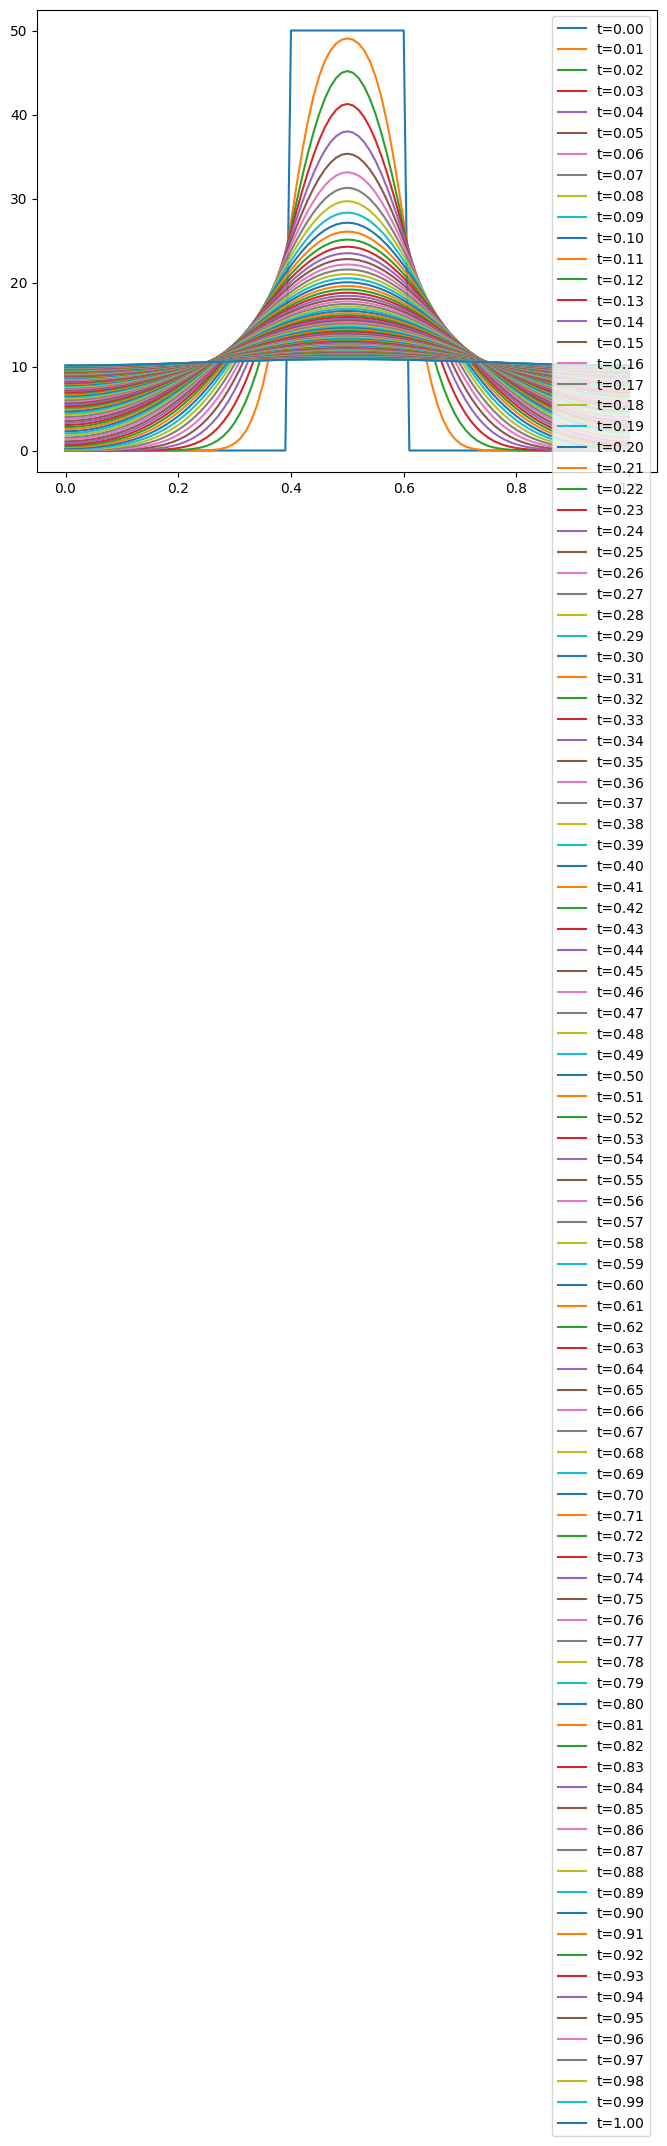

In [8]:
kappa=0.1

h_x=0.01
h_t=0.0001

x = np.arange(0, 1+h_x/2, h_x)
t = np.arange(0, 1+h_t/2, h_t)


#Condicoes de Contorno
u_a = 0 #neumann esquerdo
u_b = 0 #neumann direito
u_0 = 50 #condicao inicial em 0.4 ... 0.6

tam = len(x) #dimensão do sistema
steps = len(t) #numero de passos de tempo


r = (kappa*h_t)/(h_x**2)

u=np.zeros(tam)

for i in range(tam):
  if i*h_x >=0.4 and i*h_x <=0.6+h_x/2:
    u[i]=u_0

u_new=np.zeros(tam)
sol_tempo = []
sol_tempo.append(u)

for k in range(steps):
  for i in range(tam):
    #Condição de contorno de Neumann
    uip = 2*h_x*u_b+u[tam-2] if i==tam-1 else u[i+1] 
    uim = 2*h_x*u_a+u[1] if i==0 else u[i-1] 

    u_new[i] = r*(uim - 2*u[i]+ uip) + u[i]
  u = np.copy(u_new)
  sol_tempo.append(u)


#Plotando a solução a cada p passos

p=100

for k in range(0,steps, p):
  plt.plot(x,sol_tempo[k], label='t='+"{:.2f}".format(k*h_t))
plt.legend()

plt.show()

